In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [68]:
fmaps = []
with h5py.File('/media/hdd1/g4sim/beamlet_dose/HN011/fmaps.h5', 'r') as h5fd:
    g = h5fd['beams']['metadata']
    keys = list(g)
    for key in sorted(keys):
        fmaps.append(g[key].attrs['fmap_weights'])
fmaps_v2 = []
with h5py.File('/media/hdd1/g4sim/beamlet_dose/HN011/fmaps_v2.h5', 'r') as h5fd:
    g = h5fd['beams']['metadata']
    keys = list(g)
    for key in sorted(keys):
        fmaps_v2.append(g[key].attrs['fmap_weights'])
        
        

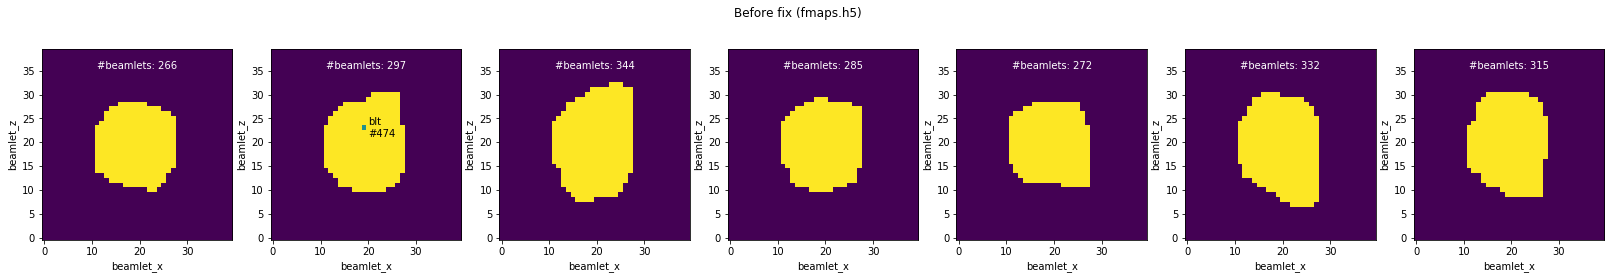

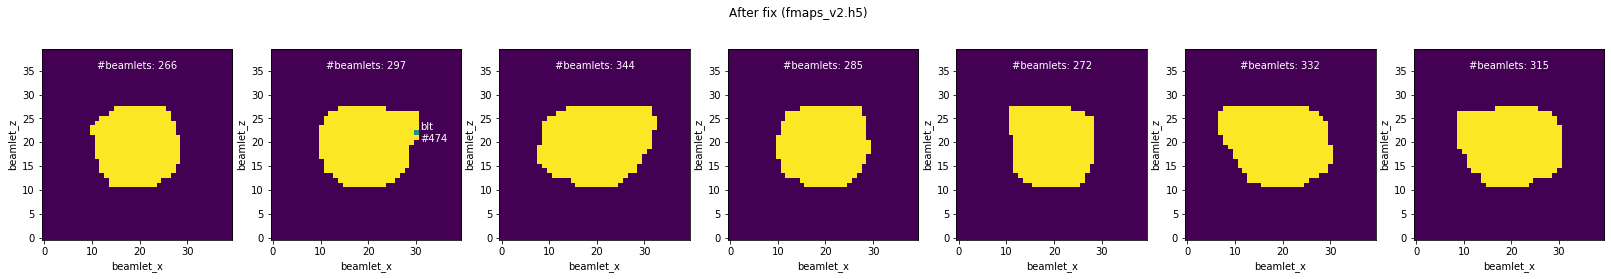

In [71]:
scale = 4
fig = plt.figure(figsize=(7*scale,1*scale))
for ii, fmap in enumerate(fmaps):
    ax = fig.add_subplot(1,7,ii+1)
    ax.text(0.5, .9, '#beamlets: {:d}'.format(np.count_nonzero(fmap)), color='white', horizontalalignment='center', transform=ax.transAxes)
    fmapcpy = fmap.copy()
    if ii==1:
        nbeamlet = 0
        for jj in range(fmap.shape[0]):
            for kk in range(fmap.shape[1]):
                if fmap[jj][kk] >0:
                    nbeamlet+=1
                    if nbeamlet>=473-266 and nbeamlet <= 473-266:
                        fmapcpy[jj][kk] = 0.5
                        ax.text(kk+1, jj, 'blt\n#474', verticalalignment='center', color='black')
                
    ax.imshow(fmapcpy, origin='lower')
    ax.set_xlabel('beamlet_x')
    ax.set_ylabel('beamlet_z')
    plt.suptitle("Before fix (fmaps.h5)")
plt.show()

scale = 4
fig = plt.figure(figsize=(7*scale,1*scale))
for ii, fmap in enumerate(fmaps_v2):
    ax = fig.add_subplot(1,7,ii+1)
    ax.text(0.5, .9, '#beamlets: {:d}'.format(np.count_nonzero(fmap)), color='white', horizontalalignment='center', transform=ax.transAxes)
    fmapcpy = fmap.copy()
    if ii==1:
        nbeamlet = 0
        for jj in range(fmap.shape[0]):
            for kk in range(fmap.shape[1]):
                if fmap[jj][kk] >0:
                    nbeamlet+=1
                    if nbeamlet>=473-266 and nbeamlet <= 473-266:
                        fmapcpy[jj][kk] = 0.5
                        ax.text(kk+1, jj, 'blt\n#474', verticalalignment='center', color='white')
                
    ax.imshow(fmapcpy, origin='lower')
    ax.set_xlabel('beamlet_x')
    ax.set_ylabel('beamlet_z')
    plt.suptitle("After fix (fmaps_v2.h5)")
plt.show()

266